<a href="https://colab.research.google.com/github/fjpa121197/DataScienceDM/blob/master/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random #https://pynative.com/python-random-choice/

In [0]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
def bootstrap_mean(sample,sample_size,n_iterations):

  bst = np.empty(shape=(n_iterations,sample_size))#create a (n_iterations x sample_size array)
  #randomly filled the arrays
  for x in range(n_iterations):
    for y in range(sample_size):
      bst[x][y] = random.choice(sample)
  #Get the mean of each sample
  data_mean_all = []
  for x in range(bst.shape[0]):
    data_mean_all.append(np.mean(bst[x]))
    
  data_mean_all = np.sort(data_mean_all)

  percentile_low = np.percentile(data_mean_all,2.5)
  percentile_high = np.percentile(data_mean_all,97.5)

  last_array= np.where(data_mean_all > percentile_low,data_mean_all,-1)
  last_array = np.where(last_array < percentile_high,last_array,-1)
  last_array = np.sort(last_array)
  i = 0
  while i > -1:
    if last_array[i] != -1:
      lower = last_array[i]
      break
    i += 1
  upper = last_array[-1]

  data_mean = 0
  count = 0
  for idx,x in enumerate(last_array):
    if last_array[idx] != -1:
      count += 1
      data_mean = data_mean + last_array[idx]

  data_mean = data_mean/count

  return data_mean,lower,upper

In [0]:

# Call your bootstrap function and plot the results
boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])



     Boostrap Iterations       Mean  Value
0                    100   9.393617   mean
1                    100   6.928571  lower
2                    100  12.285714  upper
3                   1100   9.197426   mean
4                   1100   6.571429  lower
..                   ...        ...    ...
295                98100   6.500000  lower
296                98100  12.285714  upper
297                99100   9.200392   mean
298                99100   6.500000  lower
299                99100  12.285714  upper

[300 rows x 3 columns]


(0, 100000)

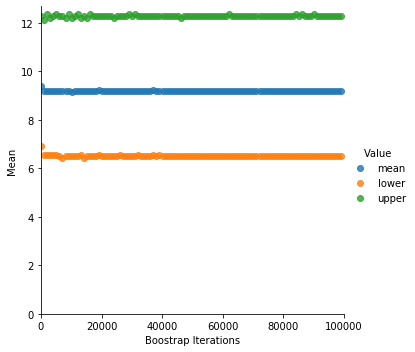

In [0]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def bootstrap_mean_ci(sample,sample_size,n_iterations,ci):

  bst = np.empty(shape=(n_iterations,sample_size))#create a (n_iterations x sample_size array)
  #randomly filled the arrays
  for x in range(n_iterations):
    for y in range(sample_size):
      bst[x][y] = random.choice(sample)
  #Get the mean of each sample
  data_mean_all = []
  for x in range(bst.shape[0]):
    data_mean_all.append(np.mean(bst[x]))
    
  data_mean_all = np.sort(data_mean_all)
  data_mean = np.mean(data_mean_all)

  percentile_low = np.percentile(data_mean_all,((100-ci)/2))
  percentile_high = np.percentile(data_mean_all,(100-((100-ci)/2)))

  last_array= np.where(data_mean_all > percentile_low,data_mean_all,-1)
  last_array = np.where(last_array < percentile_high,last_array,-1)
  last_array = np.sort(last_array)
  i = 0
  while i > -1:
    if last_array[i] != -1:
      lower = last_array[i]
      break
    i += 1
  upper = last_array[-1]

  data_mean = 0
  count = 0
  for idx,x in enumerate(last_array):
    if last_array[idx] != -1:
      count += 1
      data_mean = data_mean + last_array[idx]

  data_mean = data_mean/count


  return data_mean,lower,upper

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

     Boostrap Iterations       Mean  Value
0                    100   9.109890   mean
1                    100   7.571429  lower
2                    100  10.928571  upper
3                   1100   9.208943   mean
4                   1100   7.428571  lower
..                   ...        ...    ...
295                98100   7.357143  lower
296                98100  11.142857  upper
297                99100   9.172088   mean
298                99100   7.357143  lower
299                99100  11.142857  upper

[300 rows x 3 columns]


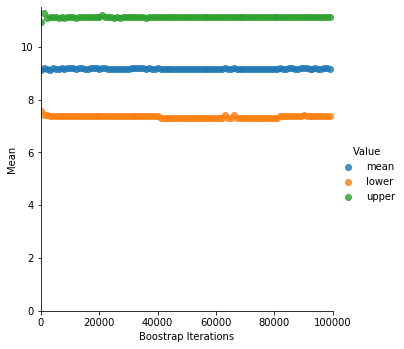

In [0]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")
print(df_boot)
sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

(2) Data visualization

In [0]:
#Read data of vehicles dataset
vdf_current = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv',usecols=["Current fleet"])
vdf_proposed = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv',usecols=["New Fleet"])
vdf_current.index +=1
vdf_proposed.index +=1
vdf_current.reset_index(inplace=True)
vdf_proposed.reset_index(inplace=True)
vdf_proposed.dropna(inplace=True)

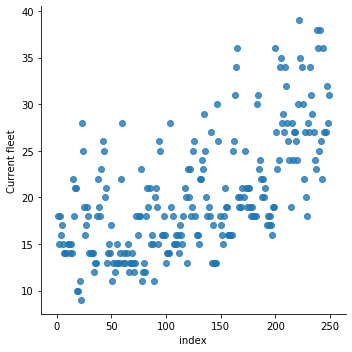

In [0]:
#Create histograms and scatterplots for current fleet and proposed fleet
#Scatter plot for current fleet
sns.lmplot(vdf_current.columns[0],vdf_current.columns[1],data = vdf_current,fit_reg=False)

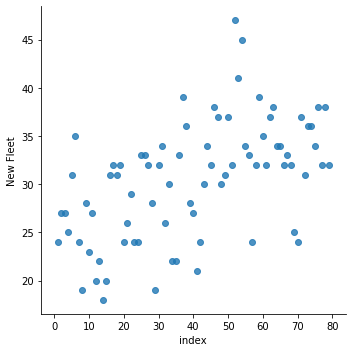

In [0]:
#Scatter plot for proposed fleet
sns.lmplot(vdf_proposed.columns[0],vdf_proposed.columns[1],data = vdf_proposed,fit_reg=False)

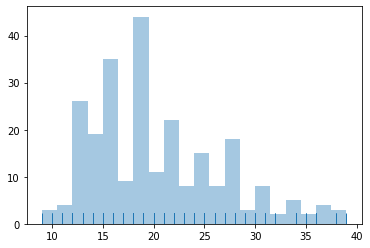

In [0]:
#Histogram for current fleet
data_current = vdf_current[vdf_current.columns[1]].values
sns.distplot(data_current,bins = 20, kde=False,rug= True)

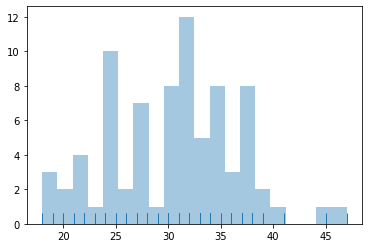

In [0]:
#Histogram for proposed fleet
data_prop = vdf_proposed[vdf_proposed.columns[1]].values
sns.distplot(data_prop,bins = 20, kde=False,rug= True)

(3) Bootstrap on the vehicles dataset

In [0]:
#Lets do bootstrap with the current and new fleet
current_cars = vdf_current.values.T[1] 
proposed_cars = vdf_proposed.values.T[1] 

mean_current = np.mean(current_cars)
mean_proposed = np.mean(proposed_cars)

print("The mean of the current fleet is: " + str(mean_current))
print("The mean of the new fleet is: " + str(mean_proposed))

The mean of the current fleet is: 20.14457831325301
The mean of the new fleet is: 30.481012658227847


In [0]:
#Bootstrap for current fleet
current_mean,current_lower,current_upper = bootstrap_mean_ci(current_cars,current_cars.shape[0],1000,90)
print("The mean for current fleet: "+ str(current_mean))
print("The lower bound for current fleet: " + str(current_lower))
print("The upper bound for current fleet: " + str(current_upper))

The mean for current fleet: 20.14087495700264
The lower bound for current fleet: 19.44578313253012
The upper bound for current fleet: 20.799196787148595


In [0]:
new_mean,new_lower,new_upper = bootstrap_mean_ci(proposed_cars,proposed_cars.shape[0],1000,90)
print("The mean for current fleet: "+ str(new_mean))
print("The lower bound for current fleet: " + str(new_lower))
print("The upper bound for current fleet: " + str(new_upper))

The mean for current fleet: 30.505919873558817
The lower bound for current fleet: 29.367088607594937
The upper bound for current fleet: 31.59493670886076


Premutation test

In [0]:
def permutation_test(data_1,data_2,n_permutations):
  t_obs = np.mean(data_2) - np.mean(data_1)
  print(t_obs)
  count = 0
  for x in range(n_permutations):
    concat = np.concatenate((data_1,data_2))
    perm = np.random.permutation(concat)
    pold = perm[:int(len(data_1))-1]
    pnew = perm[int(len(data_1)):]
   
    t_perm = np.mean(pnew)- np.mean(pold)
    if t_perm > t_obs:
      count += 1

  p_value = count / n_permutations

  return p_value

In [0]:
p_value = permutation_test(current_cars,proposed_cars,20000)
print(p_value)

10.336434344974837
0.0


Conclusion:
There is a difference between the two vehicle fleets, in this case, we conclude that the new fleet has a better MPG expenditure.